# Generate circle dataset

In [30]:
#---------------
# import modules
#---------------

import numpy as np
import joblib as jb
import pickle as pk
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.neural_network import MLPClassifier 
from sklearn.datasets import make_circles

#----------------
#Circle dataset
#----------------
n = 500 #register number
#p = 2 #featurs over our data

#generating the input X and output y (binary vector)
X_org, y_org = make_circles(n_samples=n, factor=0.1, noise=0.03, random_state=7)
#y = y[:, np.newaxis]

In [31]:
n_training = 10
max_iter = 1000

# Using with 2 circle

(500, 2) (500,)


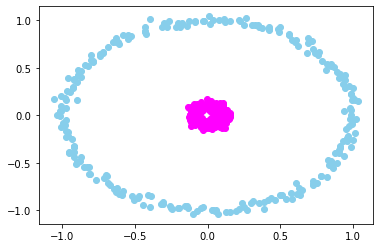

In [32]:
X = X_org
y = y_org
print(X.shape, y.shape)
plt.scatter(X[y==0, 0], X[y==0, 1], c="skyblue")
plt.scatter(X[y==1, 0], X[y==1, 1], c="magenta")
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
from collections import Counter

X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X, y, test_size=0.2, random_state=100)
print(f"Training target statistics: {Counter(y_train_bal)}")
print(f"Testing target statistics: {Counter(y_test_bal)}")

Training target statistics: Counter({1: 208, 0: 192})
Testing target statistics: Counter({0: 58, 1: 42})


In [ ]:
X_sample = len(X_train_bal)
X_input = len(X_train_bal[1])
X_class = len(np.unique(y_train_bal))

X_train = X_train_bal
y_train = y_train_bal
X_test = X_test_bal
y_test = y_test_bal

cost_test = []
metric_train = []

for i in range(n_training):
    print('Training ', i+1, '...')
    clf = MLPClassifier(hidden_layer_sizes=(X_input * 3, ), activation='tanh', solver='adam', alpha=5e-4)
    clf.out_activation_ = 'multiclass'
    partial_loss = []
    
    for _ in range(max_iter):
        clf.partial_fit(X_train, y_train, classes=[0, 1])
        partial_loss.append(clf.loss_)

    metric_train.append(partial_loss)
    y_test_pred = clf.predict(X_test)
    cost_test.append(mean_squared_error(y_test, y_test_pred))
    print ('Test prediction cost with training: ', cost_test[i]) 
    min_cost = min(cost_test)
    print ("Min test prediction cost: ", min_cost)
    if  cost_test[i] <= min_cost:
        # save the model to disk
        filename = 'adam_circle_model_113_100_1000_2_500.sav'
        jb.dump(clf, filename)
        np.save('adam_circle_bLoss_113_100_1000_2_500.npy', partial_loss)

with open('adam_circle_metric_113_100_1000_2_500', 'wb') as temp:
    pk.dump(metric_train, temp)

In [35]:
loaded_model = jb.load(filename)

print("=====================================================================")
print("=====================================================================")
y_test_pred_load = loaded_model.predict(X_test)
cost_test_load = mean_squared_error(y_test, y_test_pred_load)
acc_test_load = accuracy_score(y_test, y_test_pred_load)

y_train_pred_load = loaded_model.predict(X_train)
cost_train_load = mean_squared_error(y_train, y_train_pred_load)
acc_train_load = accuracy_score(y_train, y_train_pred_load)

print('Training: MSE: ', cost_train_load, ' ACC score: ', acc_train_load)
print('Testing: MSE: ', cost_test_load, ' ACC score: ', acc_test_load)
print("=====================================================================")
print("=====================================================================")

Training: MSE:  0.0  ACC score:  1.0
Testing: MSE:  0.0  ACC score:  1.0


# Using 3 circle

In [36]:
X_middle, y_middle = make_circles(n_samples=n, factor = 0.4, noise=0.03, random_state=7)

In [37]:
y_middle[y_middle == 1] = 2
#print(y_small)
X = np.concatenate((X, X_middle[y_middle==2]))
y = np.concatenate((y, y_middle[y_middle==2]))

# Selecting only the n points
shuffled_indices = np.random.permutation(len(X)) #return a permutation of the indices
X = X[shuffled_indices]
y = y[shuffled_indices]
X = X[:n]
y = y[:n]
print (X.shape, y.shape)

(500, 2) (500,)


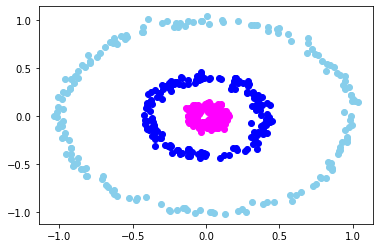

In [38]:
plt.scatter(X[y==0, 0], X[y==0, 1], c="skyblue")
plt.scatter(X[y==1, 0], X[y==1, 1], c="magenta")
plt.scatter(X[y==2, 0], X[y==2, 1], c="blue")
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
from collections import Counter

X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X, y, test_size=0.2, random_state=100)
print(f"Training target statistics: {Counter(y_train_bal)}")
print(f"Testing target statistics: {Counter(y_test_bal)}")

Training target statistics: Counter({0: 140, 1: 131, 2: 129})
Testing target statistics: Counter({1: 36, 2: 33, 0: 31})


In [ ]:
X_sample = len(X_train_bal)
X_input = len(X_train_bal[1])
X_class = len(np.unique(y_train_bal))

X_train = X_train_bal
y_train = y_train_bal
X_test = X_test_bal
y_test = y_test_bal

cost_test = []
metric_train = []

for i in range(n_training):
    print('Training ', i+1, '...')
    clf = MLPClassifier(hidden_layer_sizes=(X_input * 3, ), activation='tanh', solver='adam', alpha=5e-4)
    clf.out_activation_ = 'multiclass'
    partial_loss = []
    
    for _ in range(max_iter):
        clf.partial_fit(X_train, y_train, classes=[0, 1, 2])
        partial_loss.append(clf.loss_)

    metric_train.append(partial_loss)
    y_test_pred = clf.predict(X_test)
    cost_test.append(mean_squared_error(y_test, y_test_pred))
    print ('Test prediction cost with training: ', cost_test[i]) 
    min_cost = min(cost_test)
    print ("Min test prediction cost: ", min_cost)
    if  cost_test[i] <= min_cost:
        # save the model to disk
        filename = 'adam_circle_model_113_100_1000_3_500.sav'
        jb.dump(clf, filename)
        np.save('adam_circle_bLoss_113_100_1000_3_500.npy', partial_loss)

with open('adam_circle_metric_113_100_1000_3_500', 'wb') as temp:
    pk.dump(metric_train, temp)

In [41]:
loaded_model = jb.load(filename)

print("=====================================================================")
print("=====================================================================")
y_test_pred_load = loaded_model.predict(X_test)
cost_test_load = mean_squared_error(y_test, y_test_pred_load)
acc_test_load = accuracy_score(y_test, y_test_pred_load)

y_train_pred_load = loaded_model.predict(X_train)
cost_train_load = mean_squared_error(y_train, y_train_pred_load)
acc_train_load = accuracy_score(y_train, y_train_pred_load)

print('Training: MSE: ', cost_train_load, ' ACC score: ', acc_train_load)
print('Testing: MSE: ', cost_test_load, ' ACC score: ', acc_test_load)
print("=====================================================================")
print("=====================================================================")

Training: MSE:  0.01  ACC score:  0.99
Testing: MSE:  0.01  ACC score:  0.99


# Using 4 circles

In [42]:
X_middle_up, y_middle_up = make_circles(n_samples=n, factor = 0.7, noise=0.03, random_state=7)

In [43]:
y_middle_up[y_middle_up == 1] = 3
#print(y_small)
X = np.concatenate((X, X_middle_up[y_middle_up==3]))
y = np.concatenate((y, y_middle_up[y_middle_up==3]))

# Selecting only the n points
shuffled_indices = np.random.permutation(len(X)) #return a permutation of the indices
X = X[shuffled_indices]
y = y[shuffled_indices]
X = X[:n]
y = y[:n]
print (X.shape, y.shape)

(500, 2) (500,)


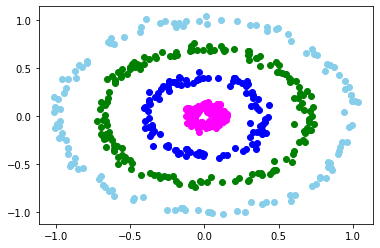

In [44]:
plt.scatter(X[y==0, 0], X[y==0, 1], c="skyblue")
plt.scatter(X[y==1, 0], X[y==1, 1], c="magenta")
plt.scatter(X[y==2, 0], X[y==2, 1], c="blue")
plt.scatter(X[y==3, 0], X[y==3, 1], c="green")
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
from collections import Counter

X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X, y, test_size=0.2, random_state=100)
print(f"Training target statistics: {Counter(y_train_bal)}")
print(f"Testing target statistics: {Counter(y_test_bal)}")

Training target statistics: Counter({3: 127, 0: 99, 1: 94, 2: 80})
Testing target statistics: Counter({3: 32, 0: 25, 2: 25, 1: 18})


In [ ]:
X_sample = len(X_train_bal)
X_input = len(X_train_bal[1])
X_class = len(np.unique(y_train_bal))

X_train = X_train_bal
y_train = y_train_bal
X_test = X_test_bal
y_test = y_test_bal

cost_test = []
metric_train = []

for i in range(n_training):
    print('Training ', i+1, '...')
    clf = MLPClassifier(hidden_layer_sizes=(X_input * 3, ), activation='tanh', solver='adam', alpha=5e-4)
    clf.out_activation_ = 'multiclass'
    partial_loss = []
    
    for _ in range(max_iter):
        clf.partial_fit(X_train, y_train, classes=[0, 1, 2, 3])
        partial_loss.append(clf.loss_)

    metric_train.append(partial_loss)
    y_test_pred = clf.predict(X_test)
    cost_test.append(mean_squared_error(y_test, y_test_pred))
    print ('Test prediction cost with training: ', cost_test[i]) 
    min_cost = min(cost_test)
    print ("Min test prediction cost: ", min_cost)
    if  cost_test[i] <= min_cost:
        # save the model to disk
        filename = 'adam_circle_model_113_100_1000_4_500.sav'
        jb.dump(clf, filename)
        np.save('adam_circle_bLoss_113_100_1000_4_500.npy', partial_loss)

with open('adam_circle_metric_113_100_1000_4_500', 'wb') as temp:
    pk.dump(metric_train, temp)

In [47]:
loaded_model = jb.load(filename)

print("=====================================================================")
print("=====================================================================")
y_test_pred_load = loaded_model.predict(X_test)
cost_test_load = mean_squared_error(y_test, y_test_pred_load)
acc_test_load = accuracy_score(y_test, y_test_pred_load)

y_train_pred_load = loaded_model.predict(X_train)
cost_train_load = mean_squared_error(y_train, y_train_pred_load)
acc_train_load = accuracy_score(y_train, y_train_pred_load)

print('Training: MSE: ', cost_train_load, ' ACC score: ', acc_train_load)
print('Testing: MSE: ', cost_test_load, ' ACC score: ', acc_test_load)
print("=====================================================================")
print("=====================================================================")

Training: MSE:  1.005  ACC score:  0.715
Testing: MSE:  0.79  ACC score:  0.69
